In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('nifty_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average
0,2022-10-03 00:00:00+05:30,17102.099609,17114.650391,16855.550781,16887.349609,278400,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
1,2022-10-04 00:00:00+05:30,17147.449219,17287.300781,17117.300781,17274.300781,226000,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
2,2022-10-06 00:00:00+05:30,17379.250000,17428.800781,17315.650391,17331.800781,265500,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
3,2022-10-07 00:00:00+05:30,17287.199219,17337.349609,17216.949219,17314.650391,216300,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
4,2022-10-10 00:00:00+05:30,17094.349609,17280.150391,17064.699219,17241.000000,234000,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352


In [4]:
df = df.drop(columns = ['Dividends', 'Stock Splits'])
df.head()

,Date,Open,High,Low,Close,Volume,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average
0,2022-10-03 00:00:00+05:30,17102.099609,17114.650391,16855.550781,16887.349609,278400,25810.85,26277.35,18837.85,25006.428,23077.352
1,2022-10-04 00:00:00+05:30,17147.449219,17287.300781,17117.300781,17274.300781,226000,25810.85,26277.35,18837.85,25006.428,23077.352
2,2022-10-06 00:00:00+05:30,17379.250000,17428.800781,17315.650391,17331.800781,265500,25810.85,26277.35,18837.85,25006.428,23077.352
3,2022-10-07 00:00:00+05:30,17287.199219,17337.349609,17216.949219,17314.650391,216300,25810.85,26277.35,18837.85,25006.428,23077.352
4,2022-10-10 00:00:00+05:30,17094.349609,17280.150391,17064.699219,17241.000000,234000,25810.85,26277.35,18837.85,25006.428,23077.352


In [5]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Previous Close     0
52-Week High       0
52-Week Low        0
50-Day Average     0
200-Day Average    0
dtype: int64

In [7]:
open = df['Open']
high = df['High']
low = df['Low']
close = df['Close']
volume = df['Volume']
prevclose = df['Previous Close']
ftwh = df['52-Week High']
ftwl = df['52-Week Low']
favg = df['50-Day Average']
tavg = df['200-Day Average']


open = np.array(open).reshape(-1, 1)
high = np.array(high).reshape(-1, 1)
low = np.array(low).reshape(-1, 1)
close = np.array(close).reshape(-1, 1)
volume = np.array(volume).reshape(-1, 1)
prevclose = np.array(prevclose).reshape(-1, 1)
ftwh = np.array(ftwh).reshape(-1, 1)
ftwl = np.array(ftwl).reshape(-1, 1)
favg = np.array(favg).reshape(-1, 1)
tavg = np.array(tavg).reshape(-1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

open = scaler.fit_transform(open)
high = scaler.fit_transform(high)
low = scaler.fit_transform(low)
close = scaler.fit_transform(close)
volume = scaler.fit_transform(volume)
prevclose = scaler.fit_transform(prevclose)
ftwh = scaler.fit_transform(ftwh)
ftwl = scaler.fit_transform(ftwl)
favg = scaler.fit_transform(favg)
tavg = scaler.fit_transform(tavg)

In [9]:
concatenated_cols = np.concatenate((open, high, low, close, volume, prevclose, ftwh, ftwl, favg, tavg), axis =1)
x_data = []
y_data = []

for i in range(60, len(concatenated_cols)):
    x_data.append(concatenated_cols[i-60:i])
    y_data.append(close[i])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train

array([[[0.01346128, 0.00574031, 0.00291763, ..., 0.        ,
         0.        , 0.        ],
        [0.01835286, 0.02447489, 0.0309932 , ..., 0.        ,
         0.        , 0.        ],
        [0.04335578, 0.03982929, 0.05226838, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.09201858, 0.11093685, 0.10145825, ..., 0.        ,
         0.        , 0.        ],
        [0.1199985 , 0.11800643, 0.12218099, ..., 0.        ,
         0.        , 0.        ],
        [0.1194537 , 0.12059439, 0.13300367, ..., 0.        ,
         0.        , 0.        ]],

       [[0.01835286, 0.02447489, 0.0309932 , ..., 0.        ,
         0.        , 0.        ],
        [0.04335578, 0.03982929, 0.05226838, ..., 0.        ,
         0.        , 0.        ],
        [0.03342683, 0.02990577, 0.04168159, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.1199985 , 0.11800643, 0.12218099, ..., 0.        ,
         0.        , 0.        ],
        [0.1

In [18]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout


sequential = Sequential()
sequential.add(GRU(units = 100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
sequential.add(Dropout(0.2))
sequential.add(GRU(units = 100, return_sequences=False))
sequential.add(Dropout(0.2))
sequential.add(Dense(1))
sequential.compile(optimizer='adam', loss='mean_squared_error')

sequential.fit(x_train, y_train, epochs=100, batch_size = 32)

C:\Anaconda3\envs\jupyter_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0356
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0067
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0027
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0021
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0023
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0014
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0017
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0015
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0015
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0013
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0012
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0017
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0013
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0015
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - l

In [19]:
from sklearn.metrics import mean_squared_error

pred = sequential.predict(x_test)
mean_squared_error(y_test, pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step


0.0031464779543104804

In [20]:
y_test_scaled = y_test.reshape(-1, 1)
pred_scaled = pred.reshape(-1, 1)

y_test_original = scaler.inverse_transform(y_test_scaled)
pred_original = scaler.inverse_transform(pred_scaled)

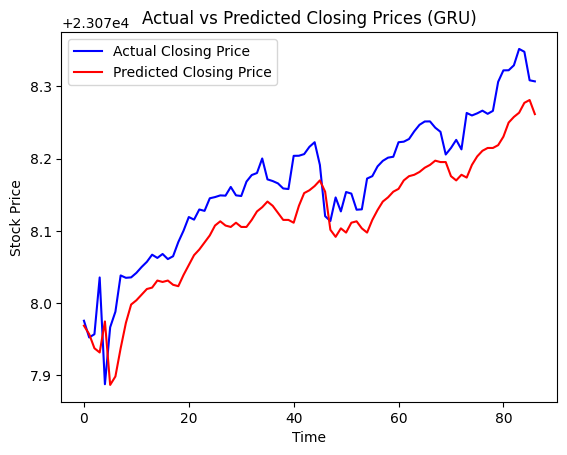

In [21]:
import matplotlib.pyplot as plt
plt.plot(y_test_original, color='blue', label='Actual Closing Price')
plt.plot(pred_original, color='red', label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices (GRU)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()